In [1]:
import os
import json
from utilities import plot_save_scores
from utilities import score_auc
from utilities import get_empirical_threshold
from utilities import plot_vs_parameter
%matplotlib inline

# Plot of Empirical Threshold as a Function of Walk Length

Skipping q_0.8_walk_len_1.json because the empirical threshold does not exist for this walk_length.


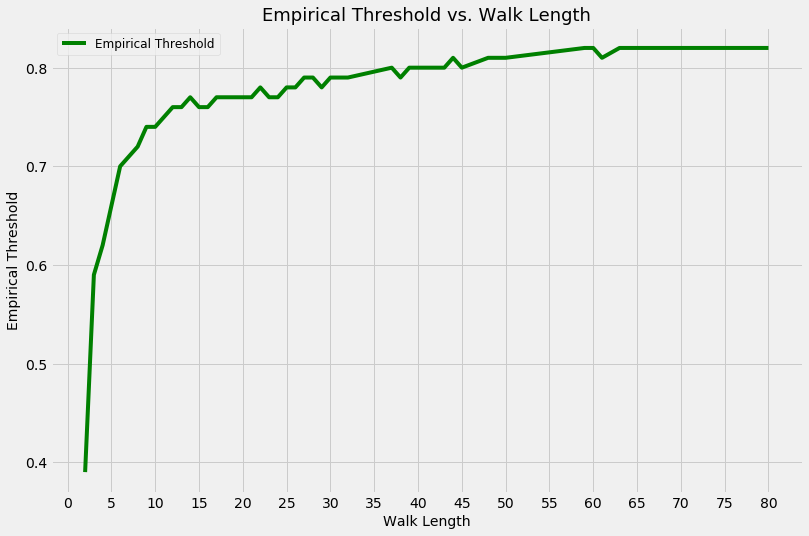

In [2]:
empirical_thresholds = []
walk_lengths = []

dir_files = [file for file in os.listdir('../data') if ('.json' in file) and ('walk_len_' in file)]
for file_name in sorted(dir_files, key=lambda x: float(x.split('walk_len_')[-1].split('.json')[0])):
    with open('../data/'+file_name, 'r') as fp:
        current_status = json.load(fp)
    epsilons = current_status.get('epsilons',None)
    ag_scores_plot = current_status.get('agreement_scores_plot',None)
    walk_length = current_status.get('walk_length',None)
    if epsilons is None:
        print('Skipping {0} because epsilons does not exist for this walk_length.'.format(file_name))
        continue
    if ag_scores_plot is None:
        print('Skipping {0} because ag_scores_plot does not exist for this walk_length.'.format(file_name))
        continue
    if walk_length is None:
        print('Skipping {0} because walk_length does not exist for this walk_length.'.format(file_name))
        continue
        
    emp_threshold = get_empirical_threshold(epsilons=epsilons,
                                            scores=ag_scores_plot,
                                            PROP_SUCCESS_CUT_OFF=0.75,
                                            SCORE_CUT_OFF=0.75
                                           )
    if emp_threshold is None:
        print('Skipping {0} because the empirical threshold does not exist for this walk_length.'.format(file_name))
        continue
    empirical_thresholds.append(emp_threshold)
    walk_lengths.append(walk_length)
# PLOT
plot_vs_parameter(file_name='walk_len_plot',
                  param_values={'Walk Length' : walk_lengths},
                  y_values={'Empirical Threshold' : empirical_thresholds},
                  display=True
                 )

# All the Phase Change Plots in a Row; Sorted by Walk Length

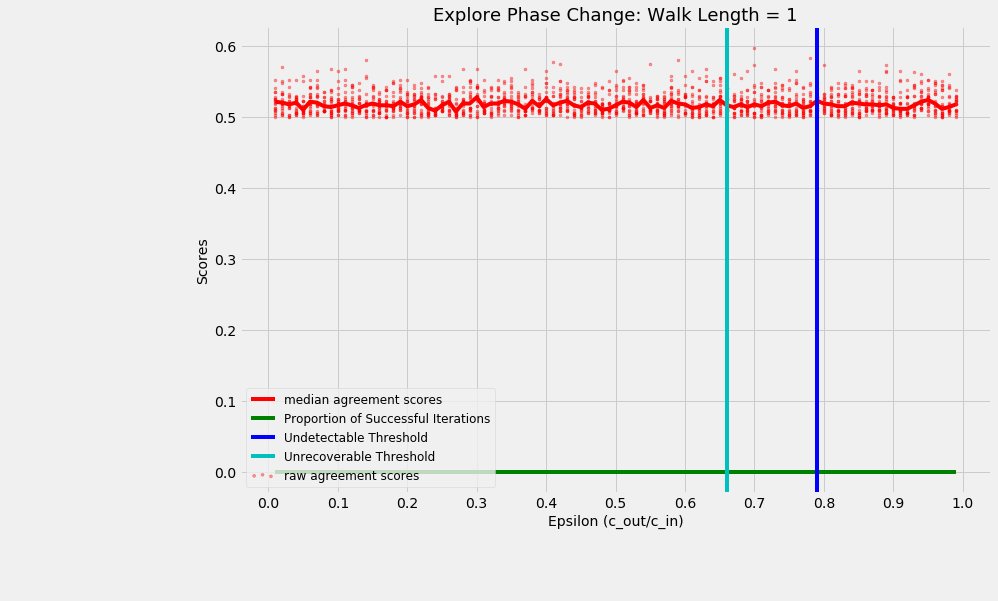

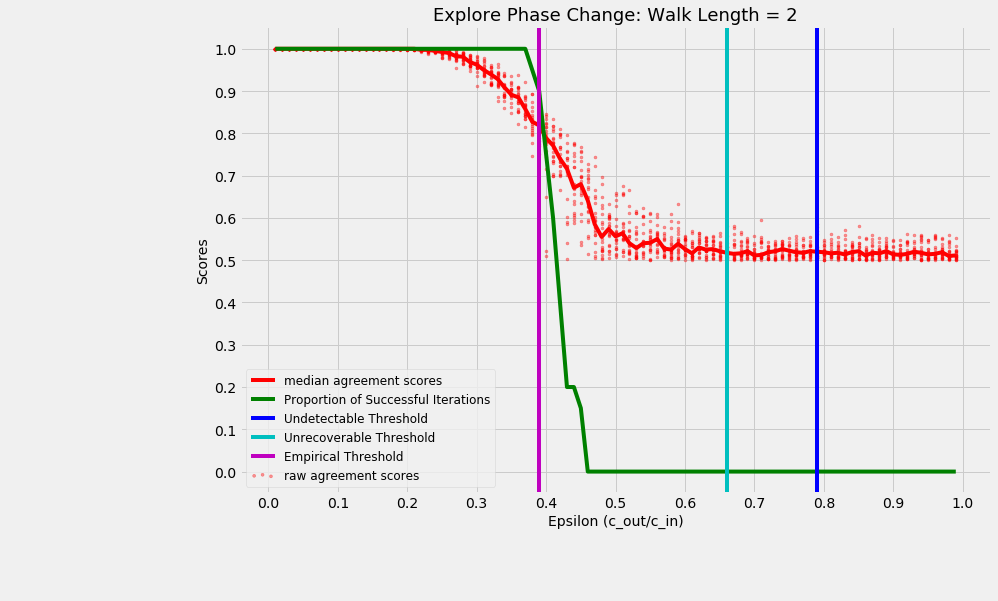

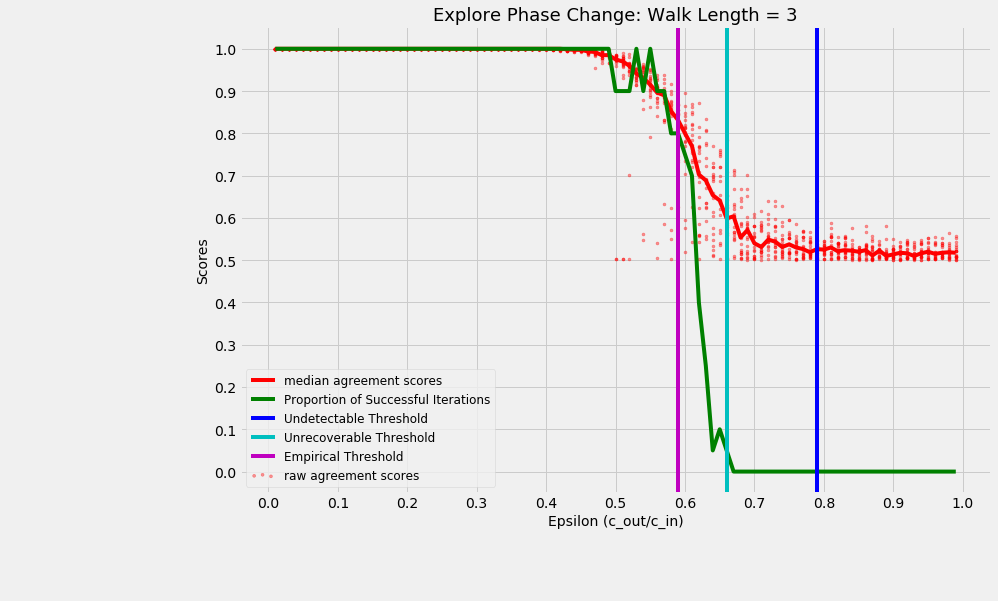

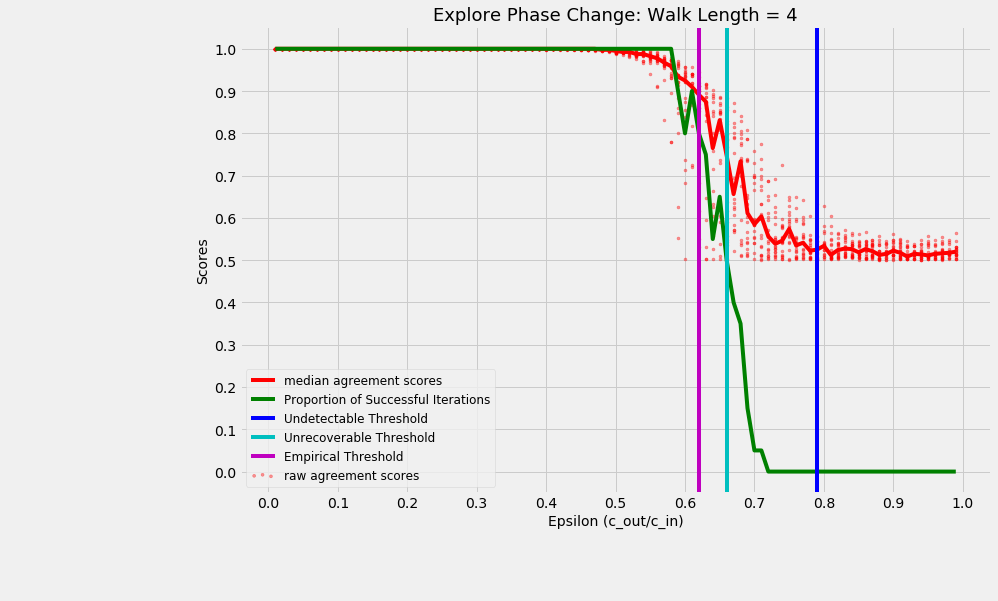

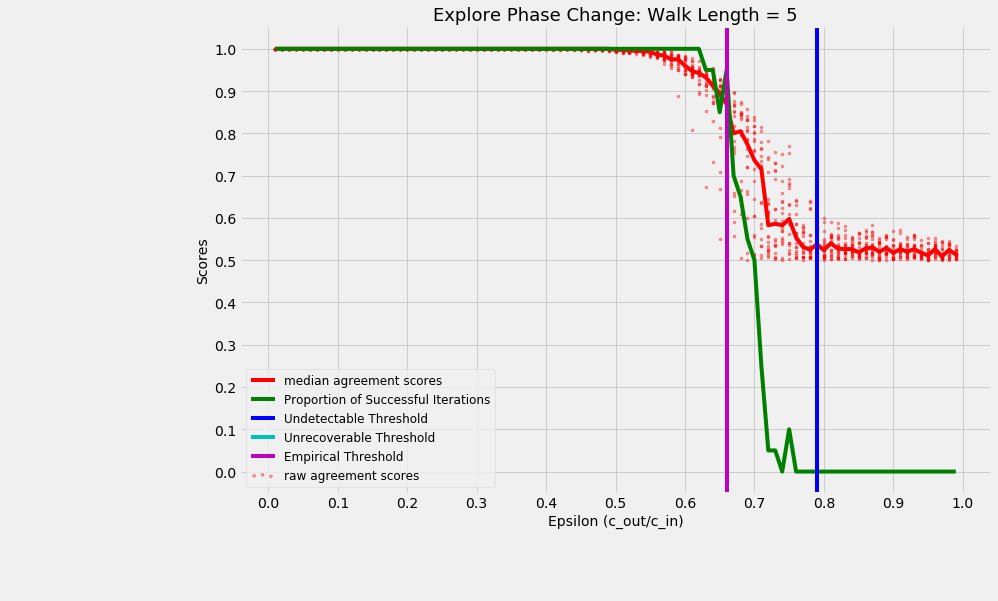

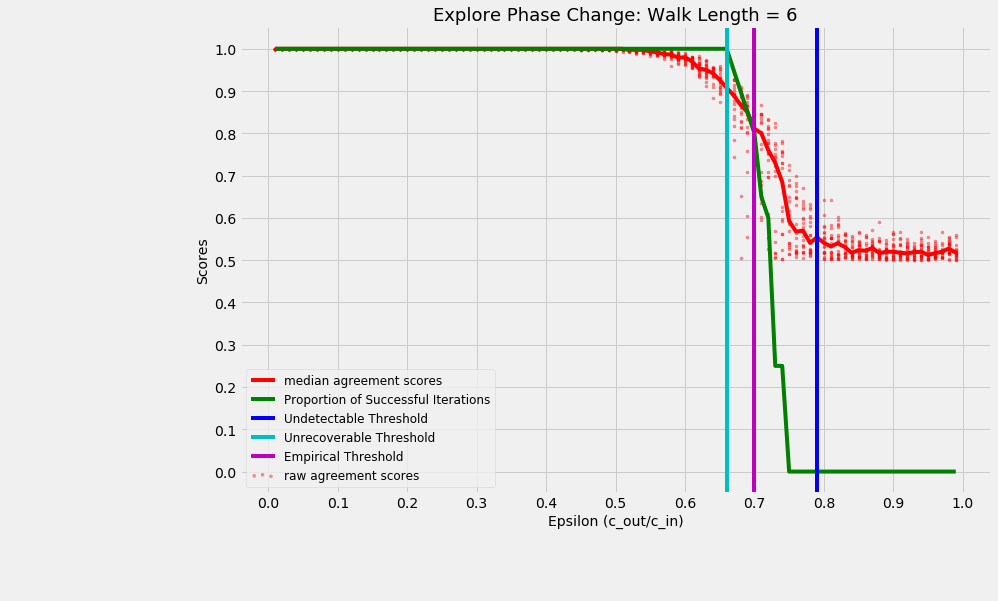

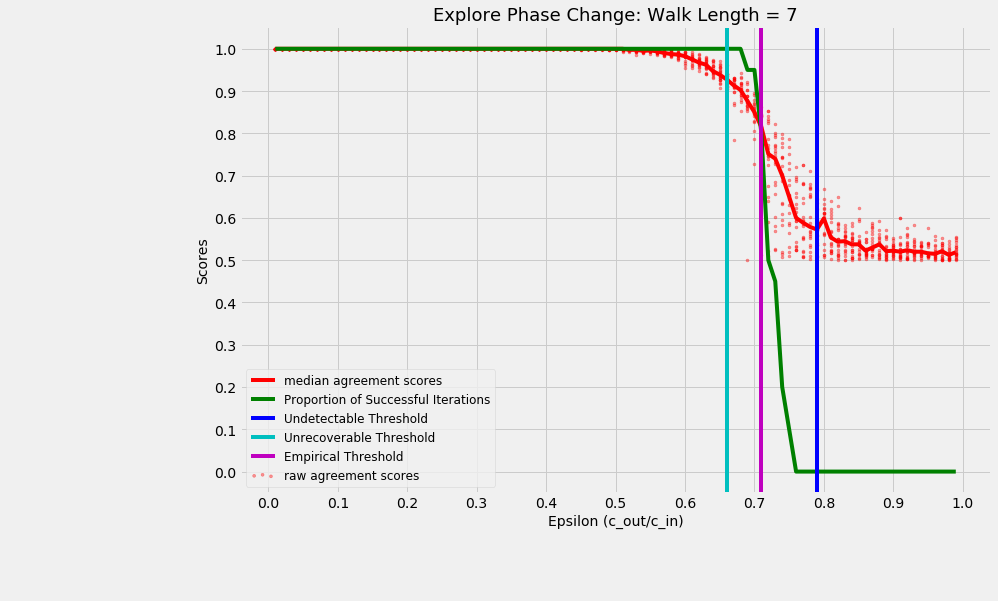

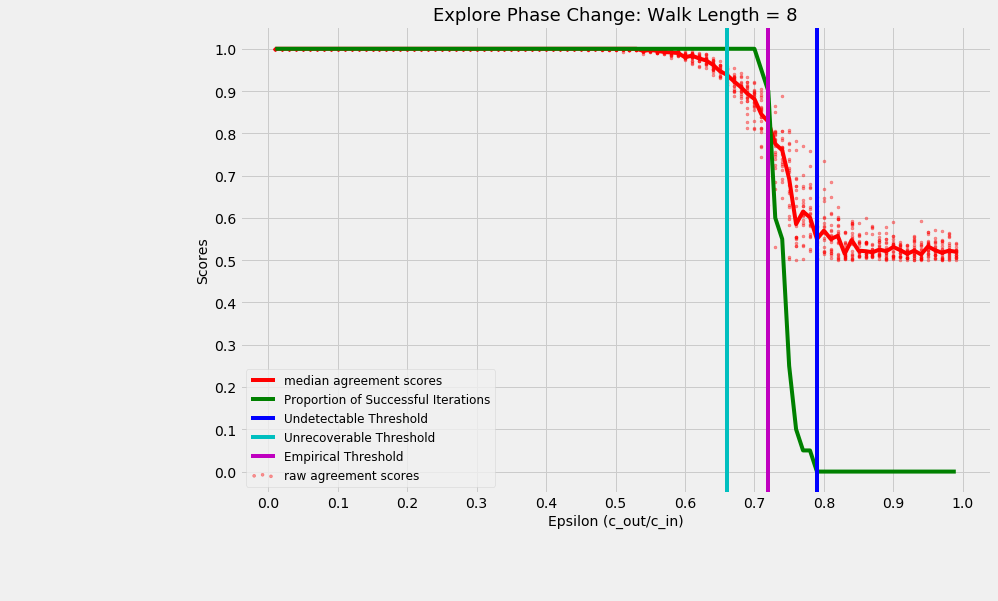

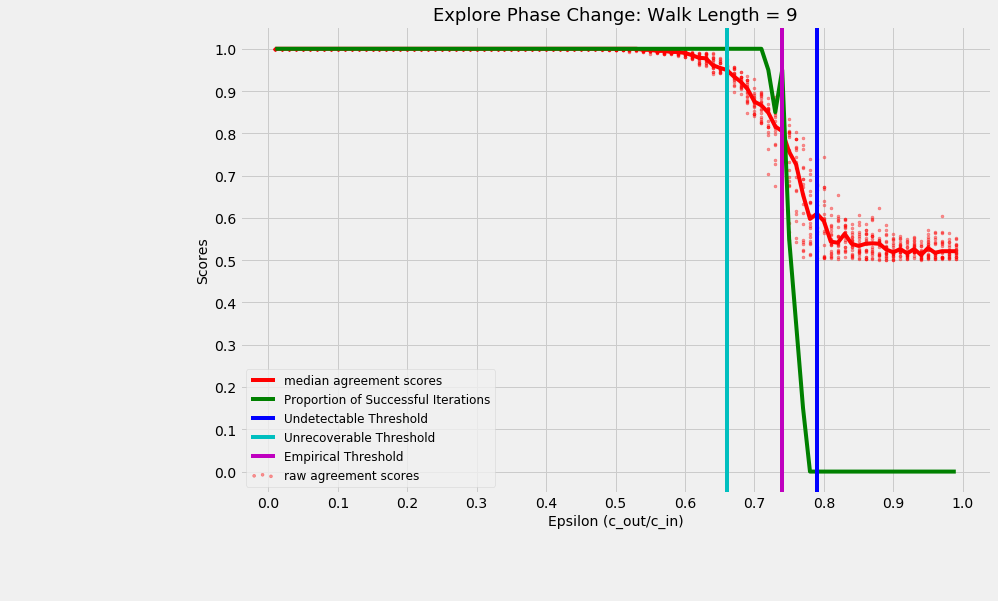

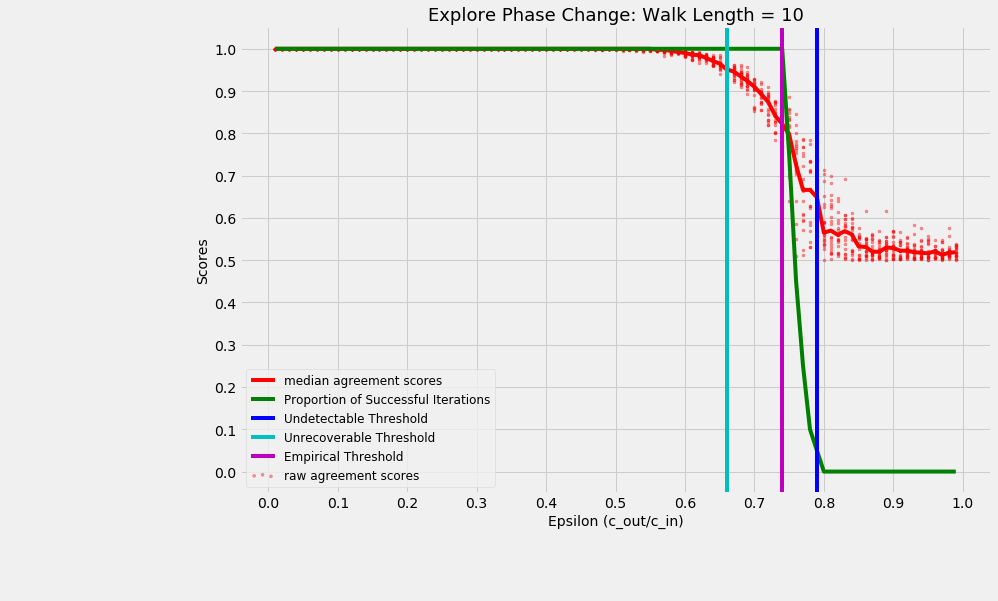

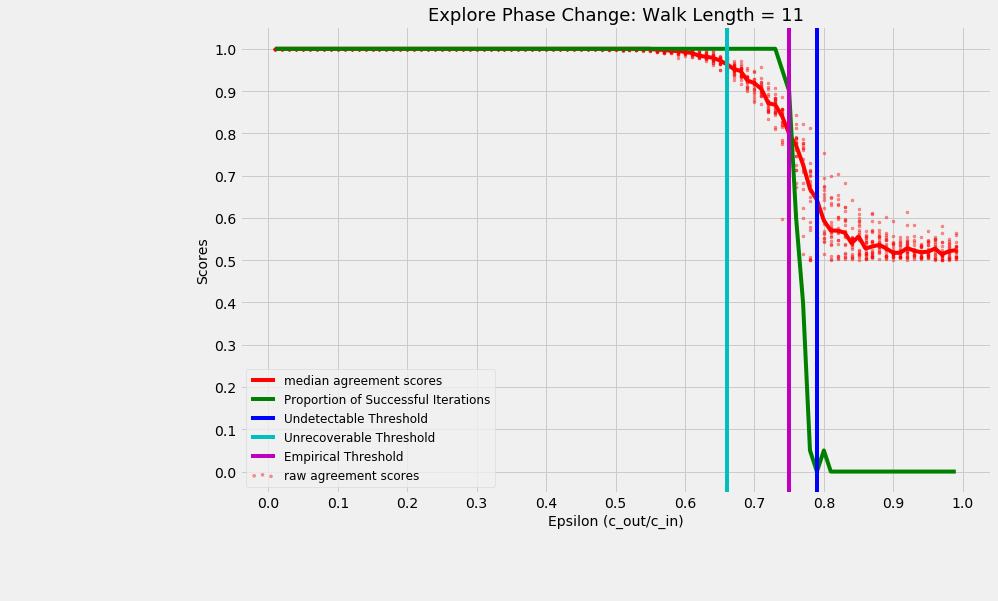

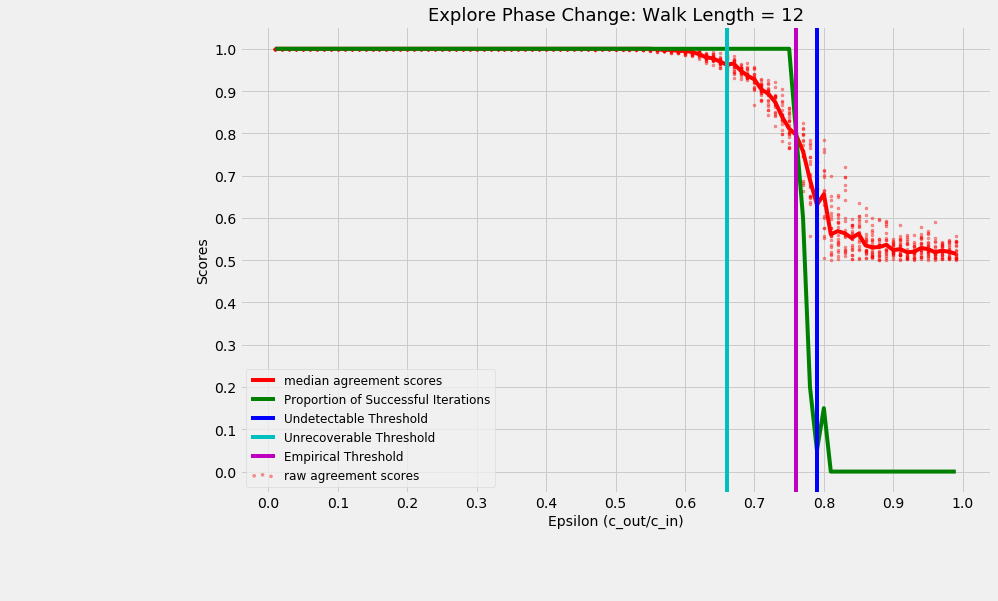

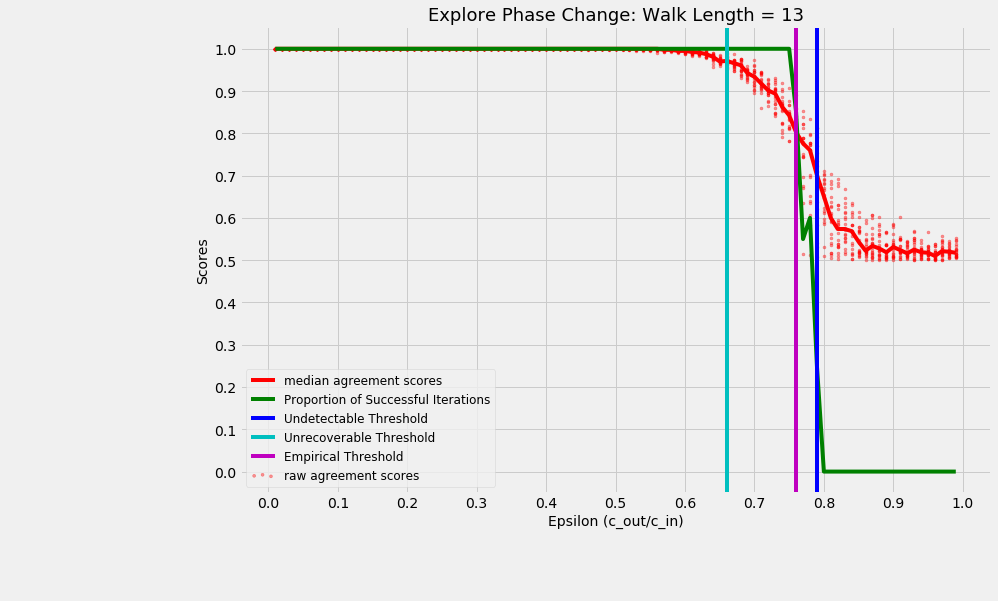

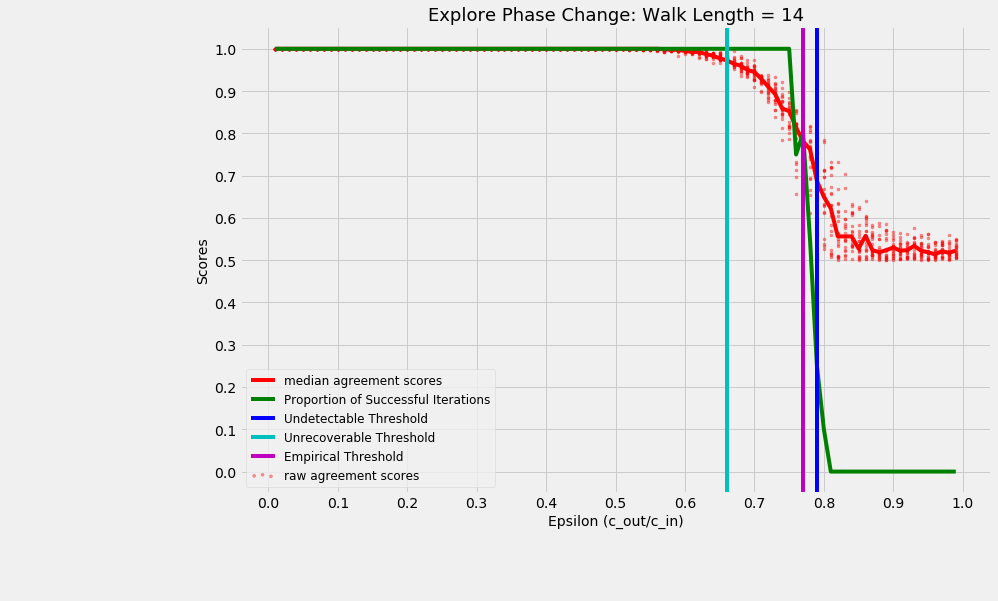

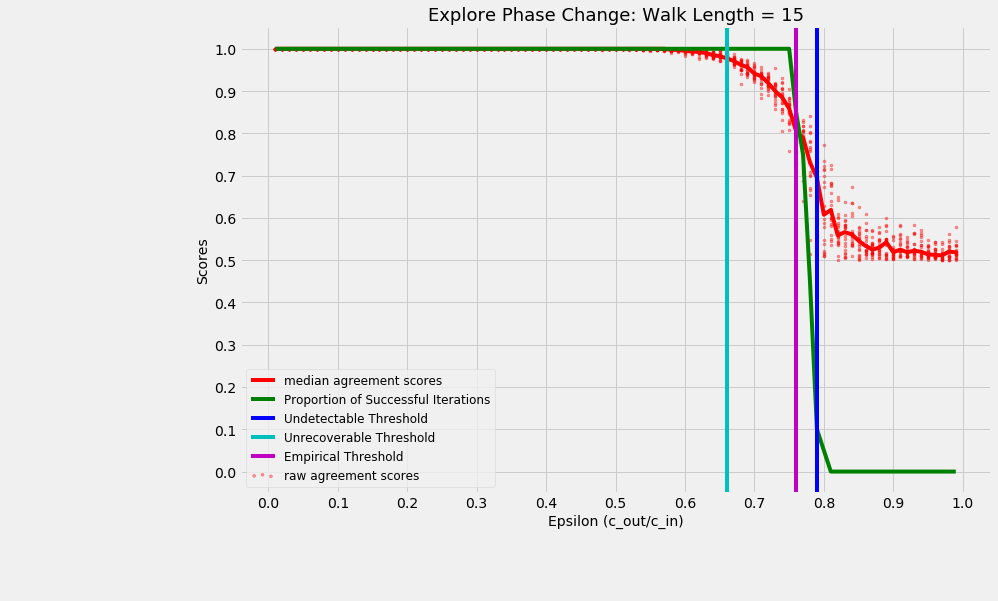

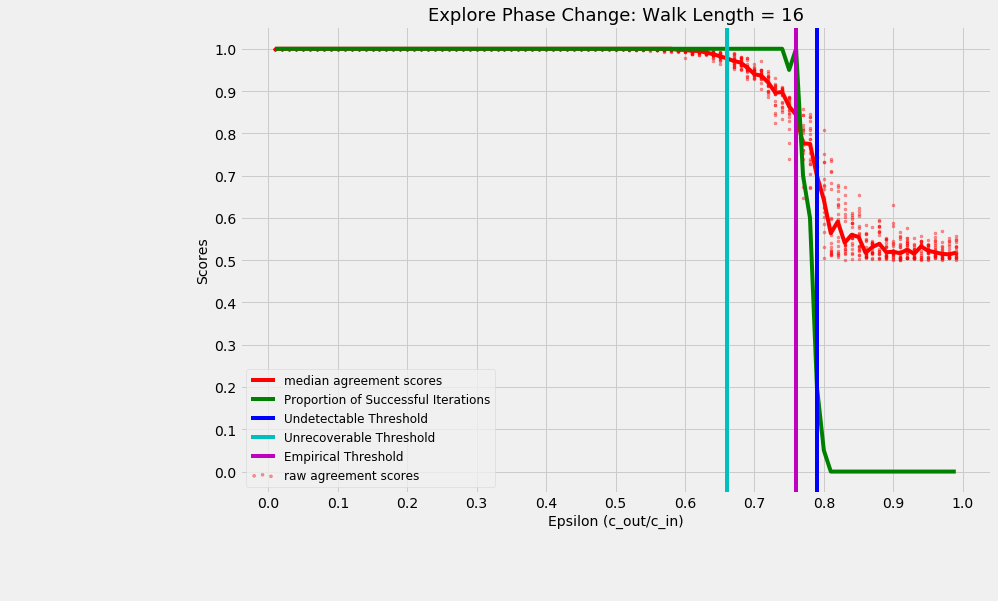

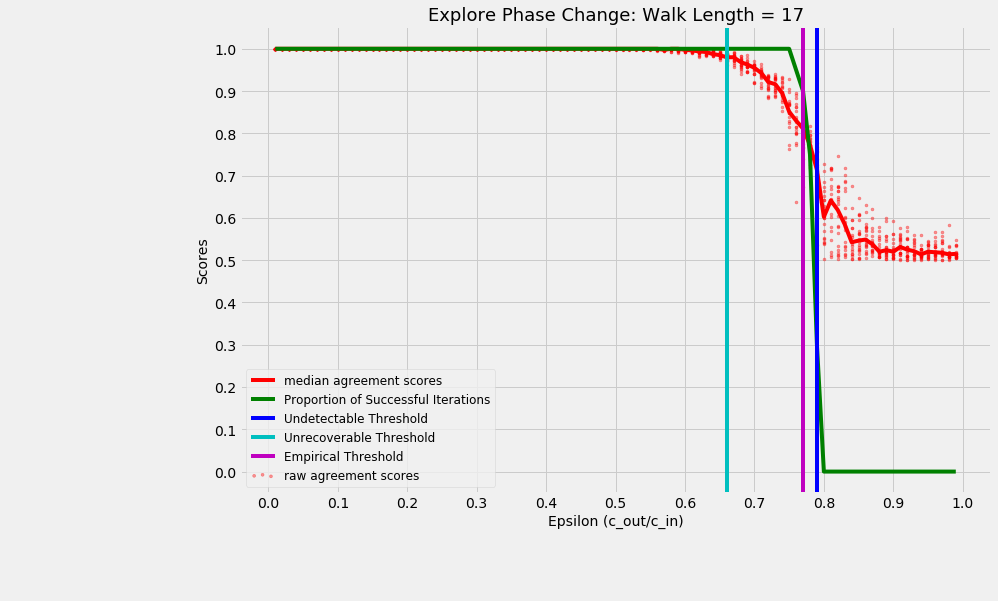

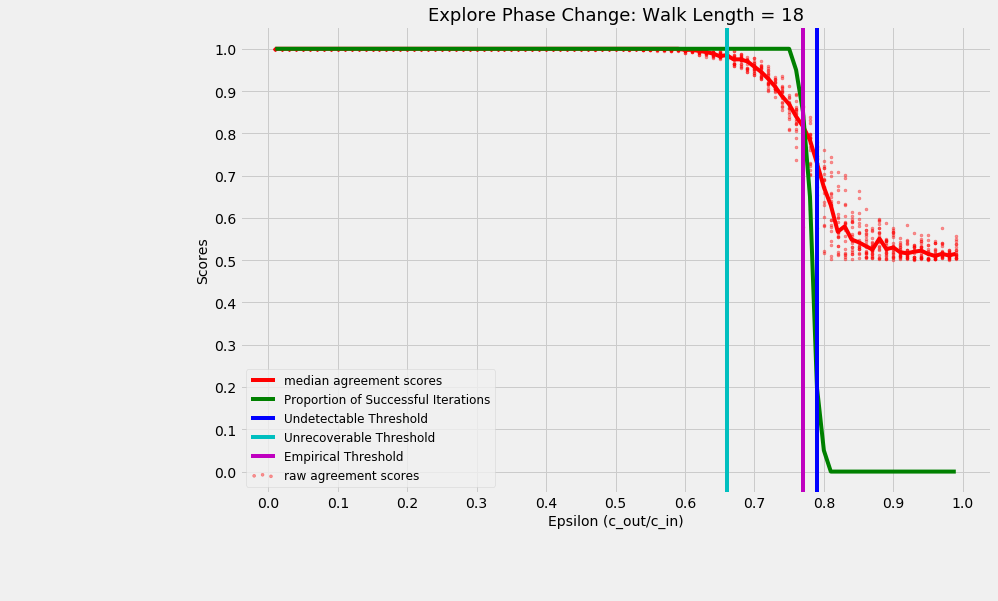

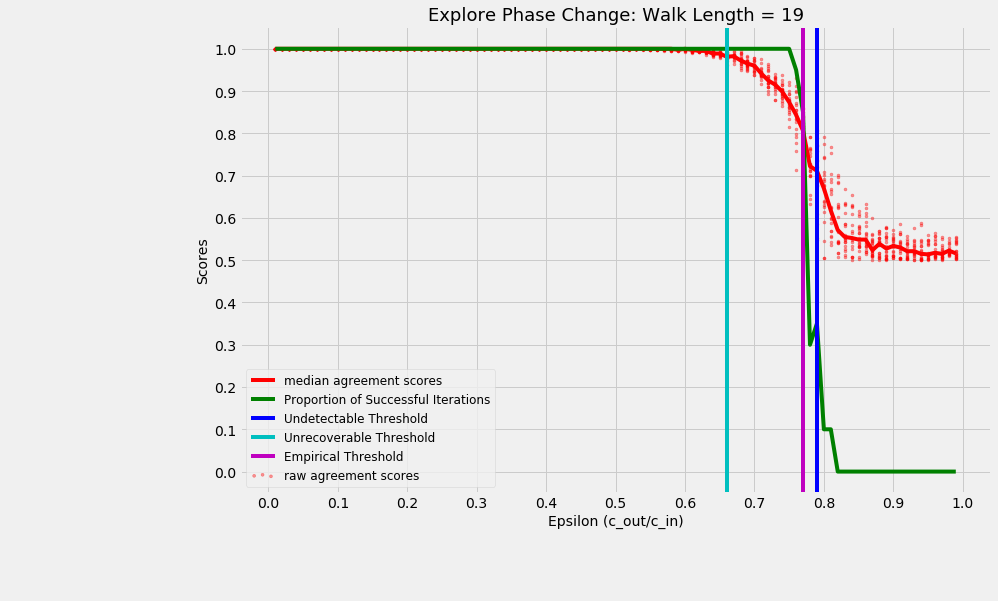

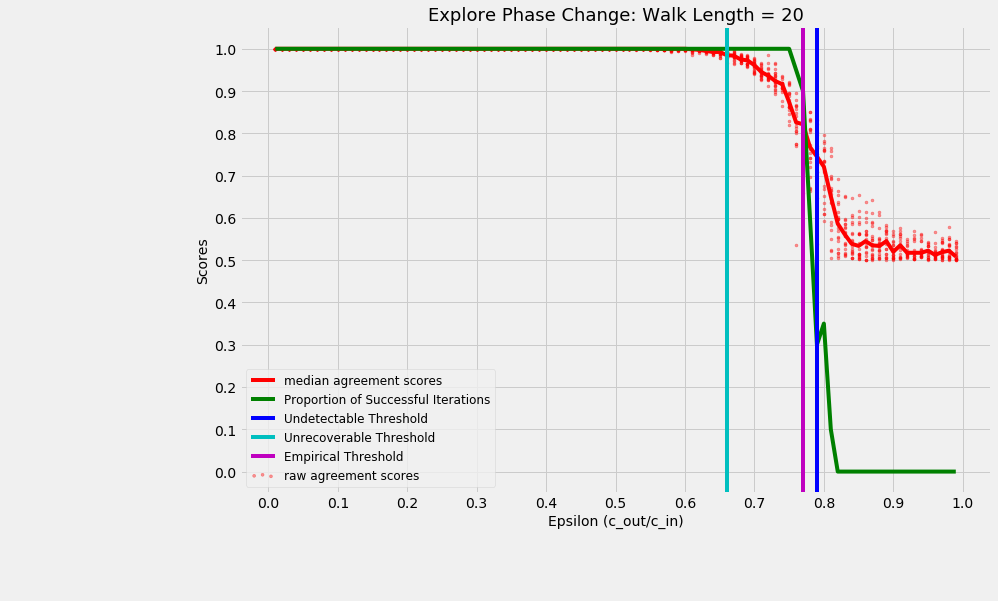

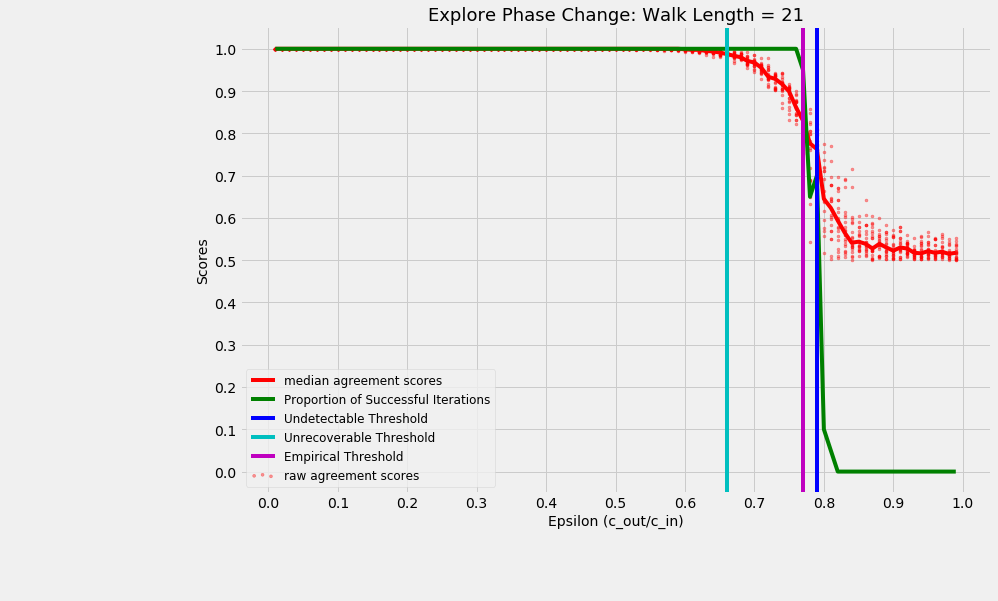

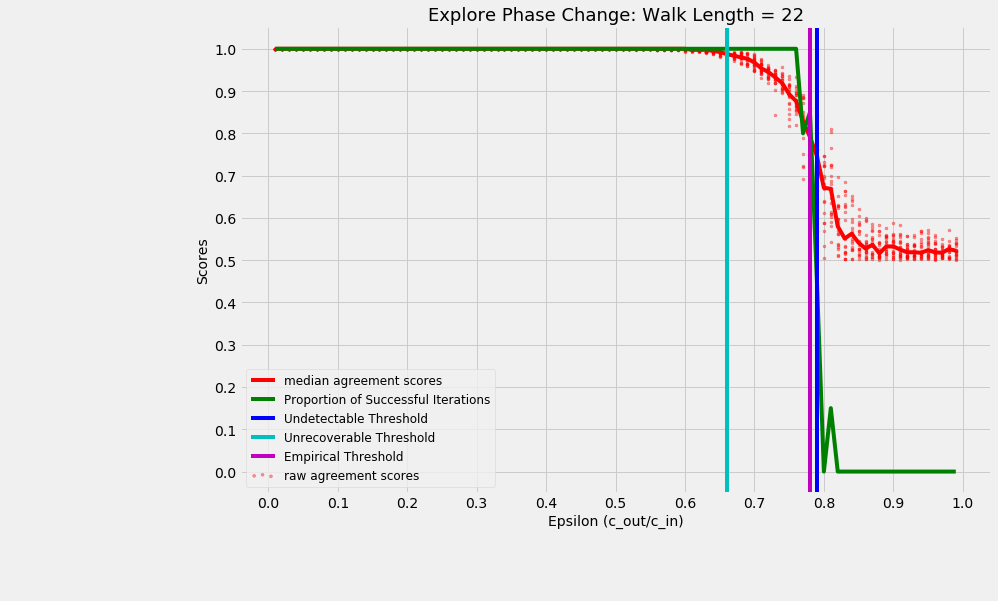

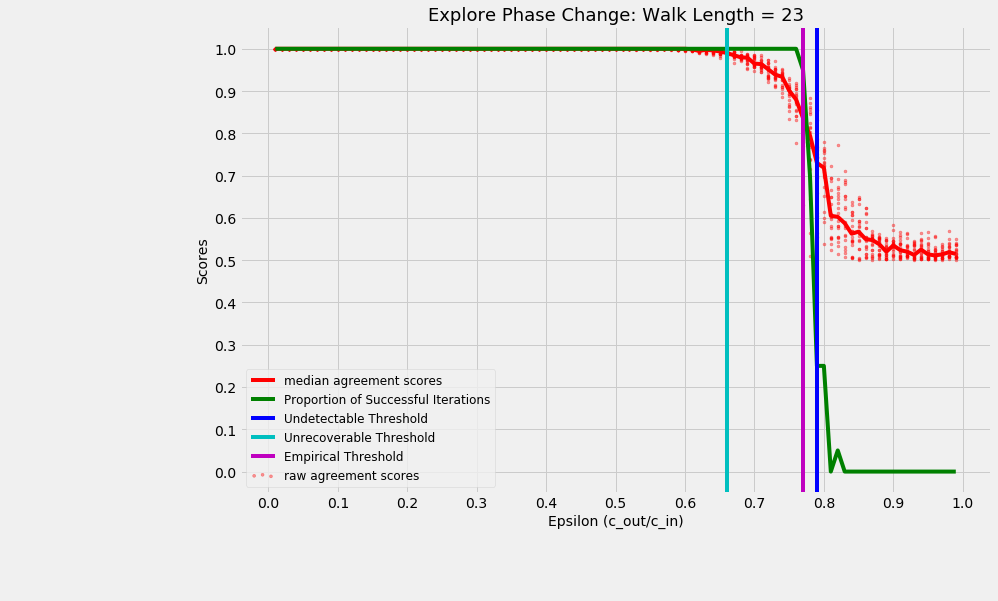

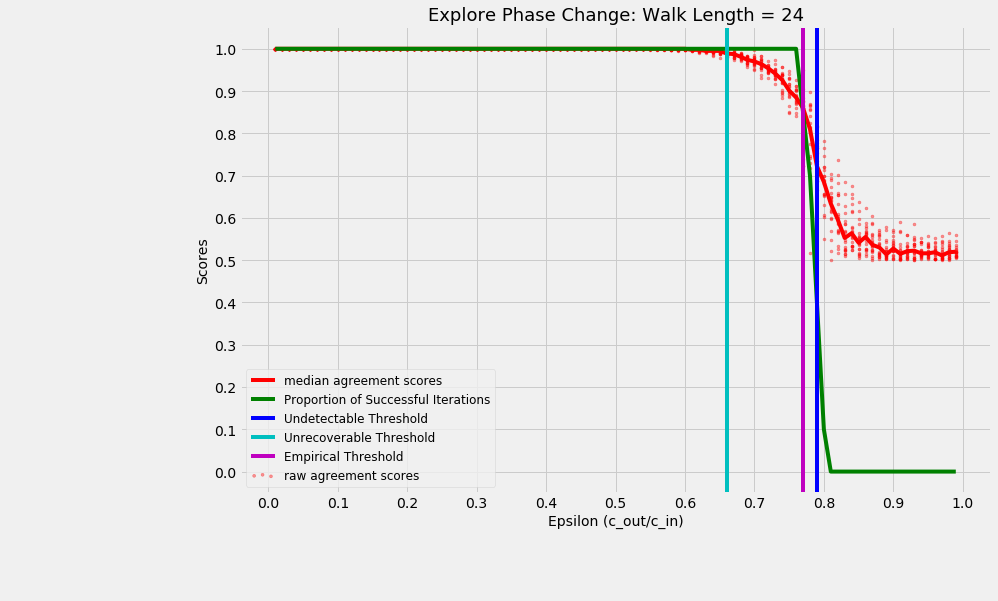

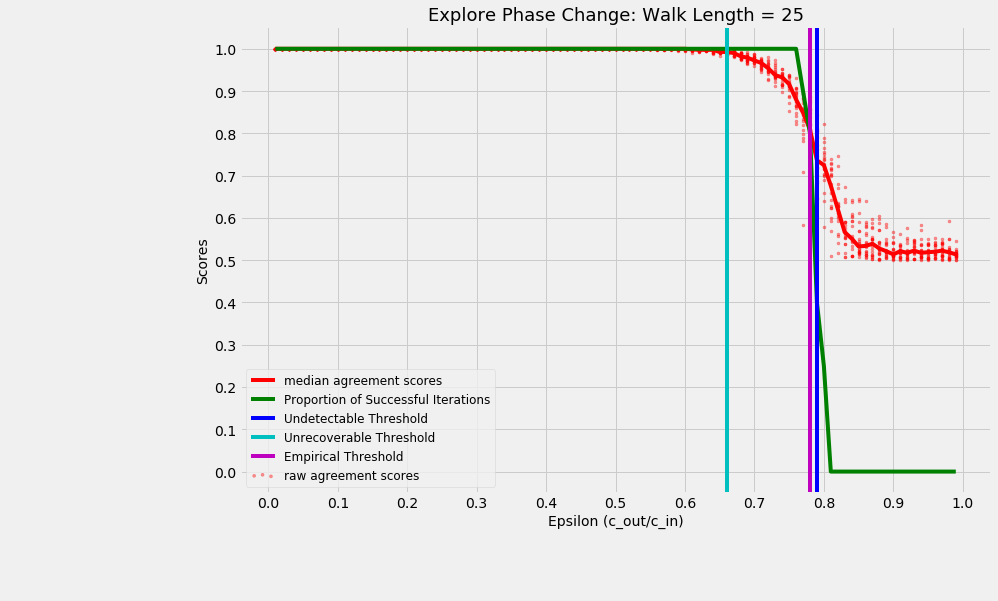

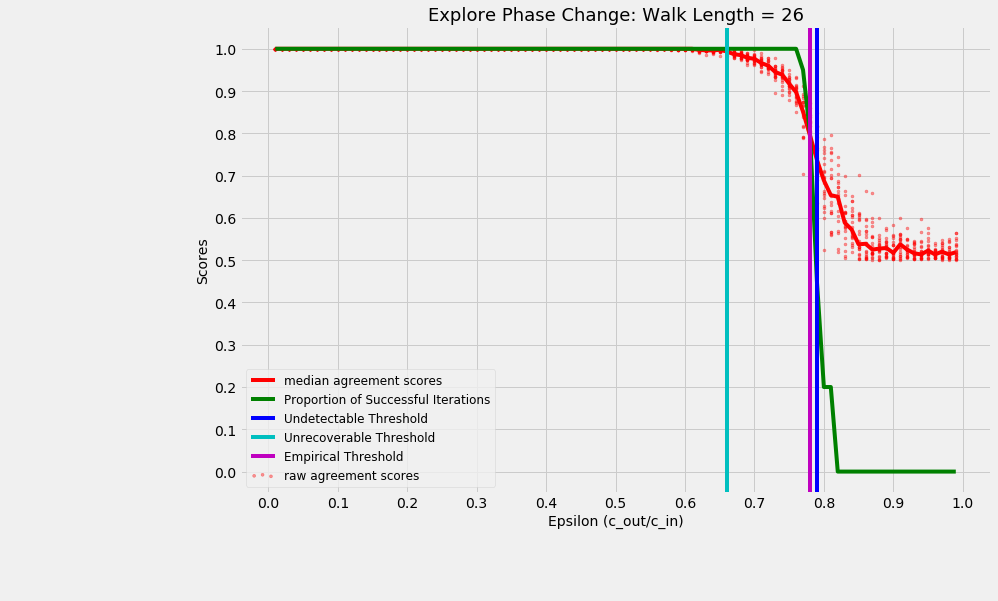

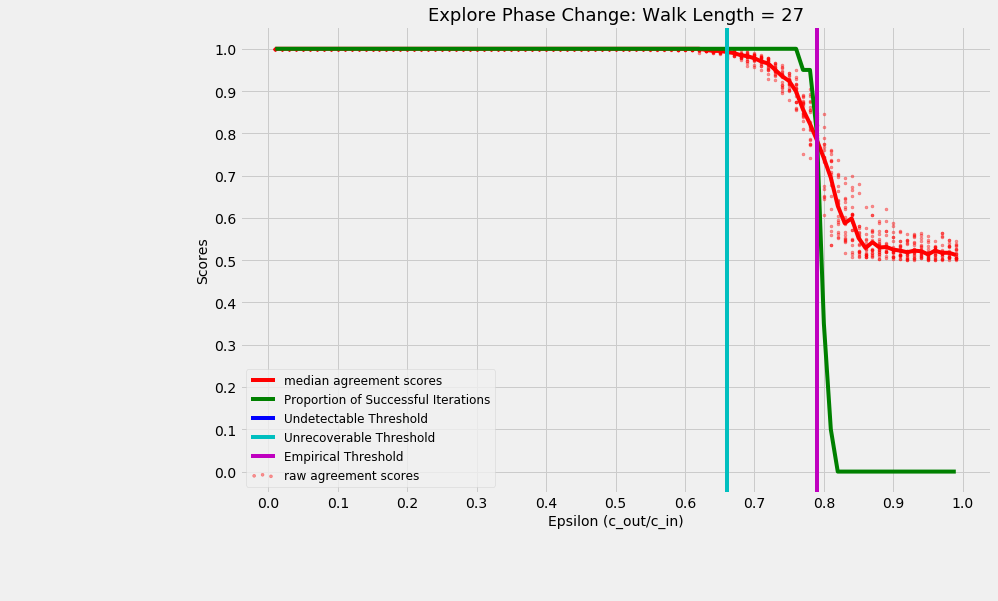

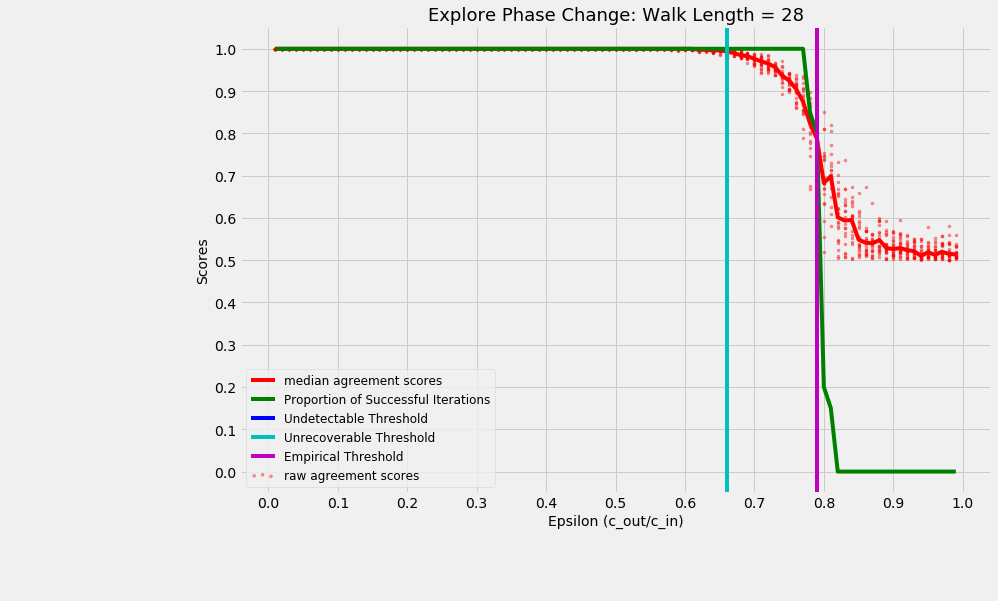

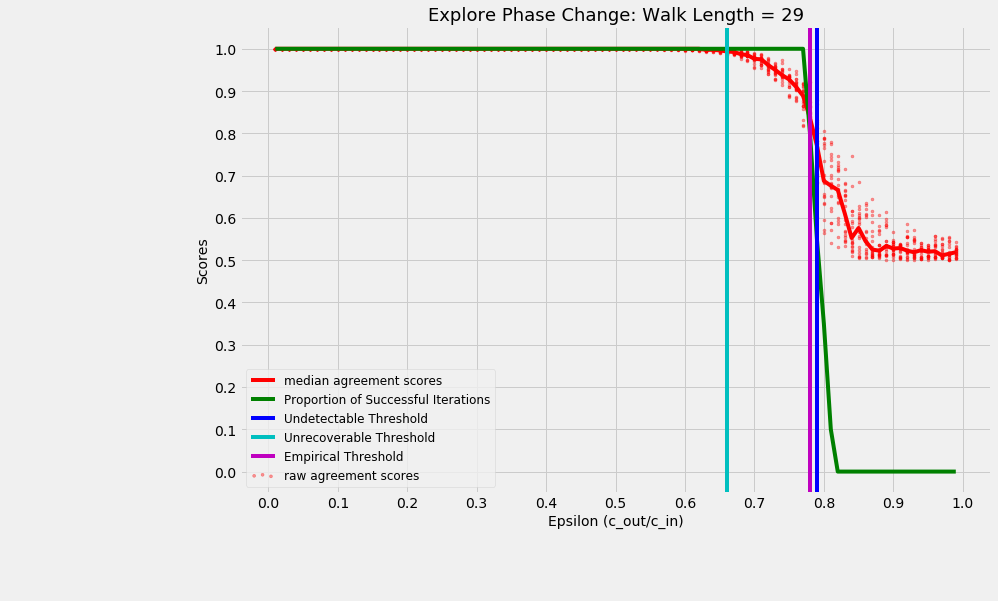

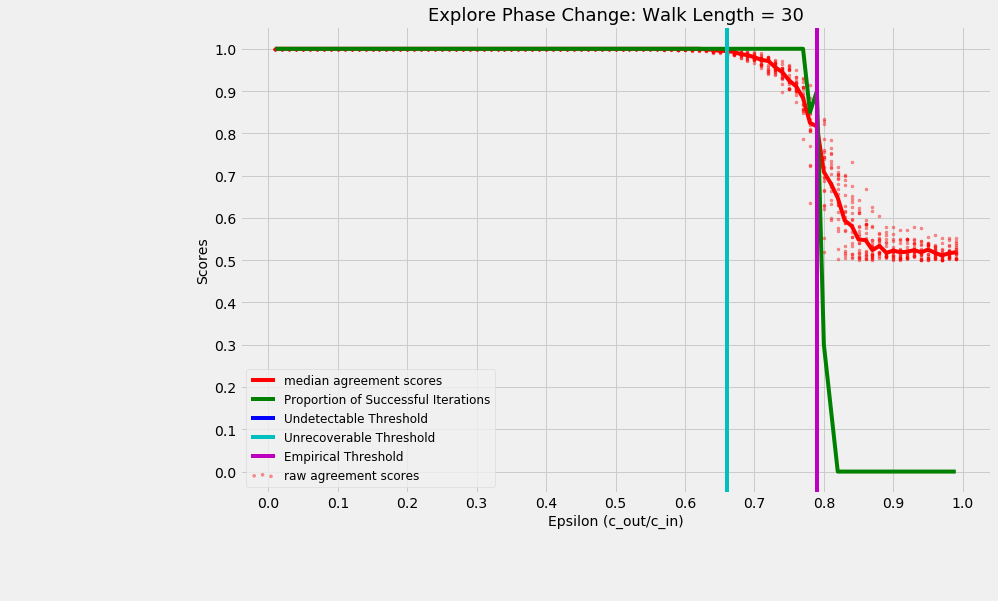

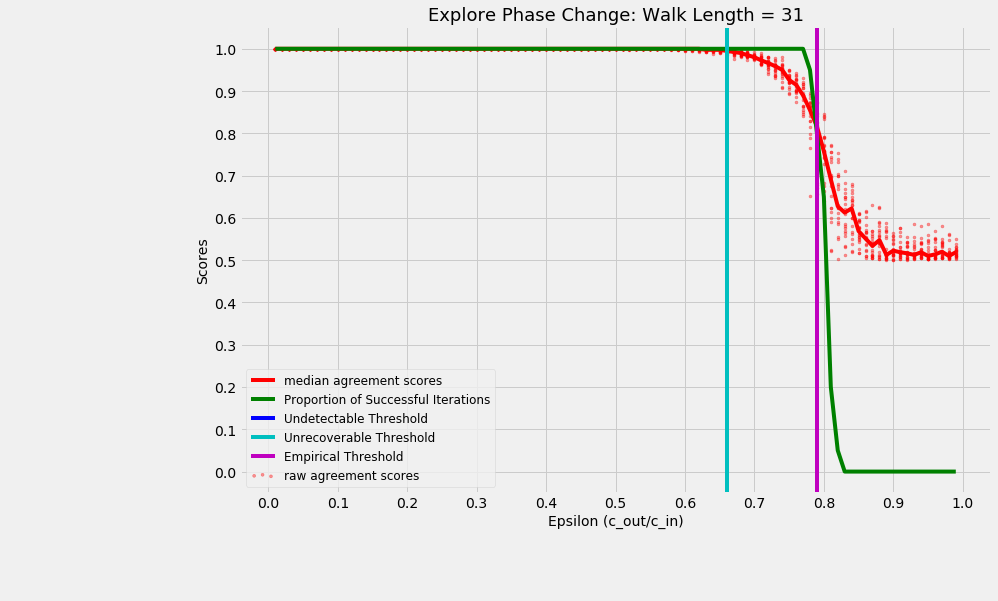

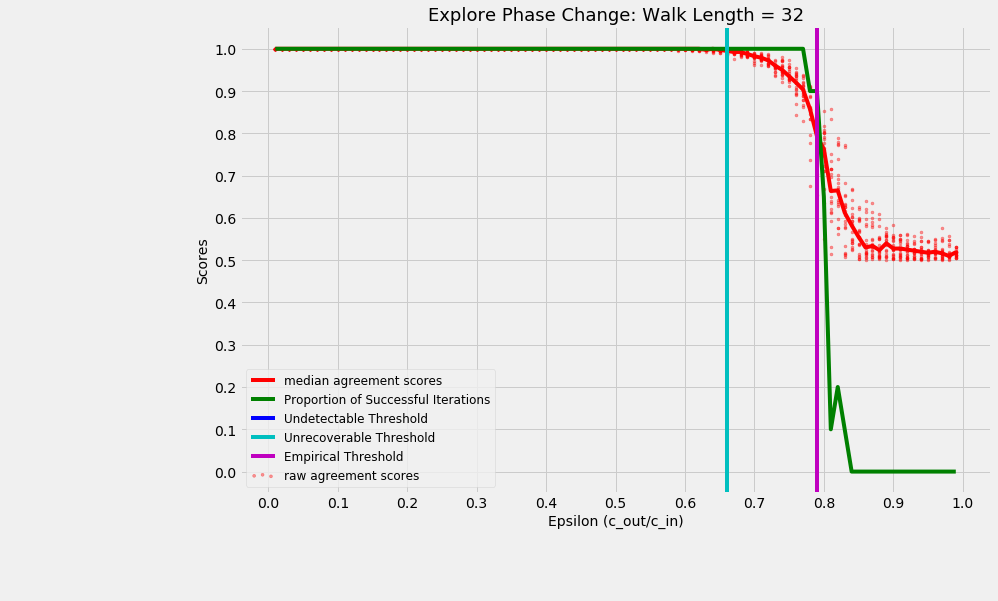

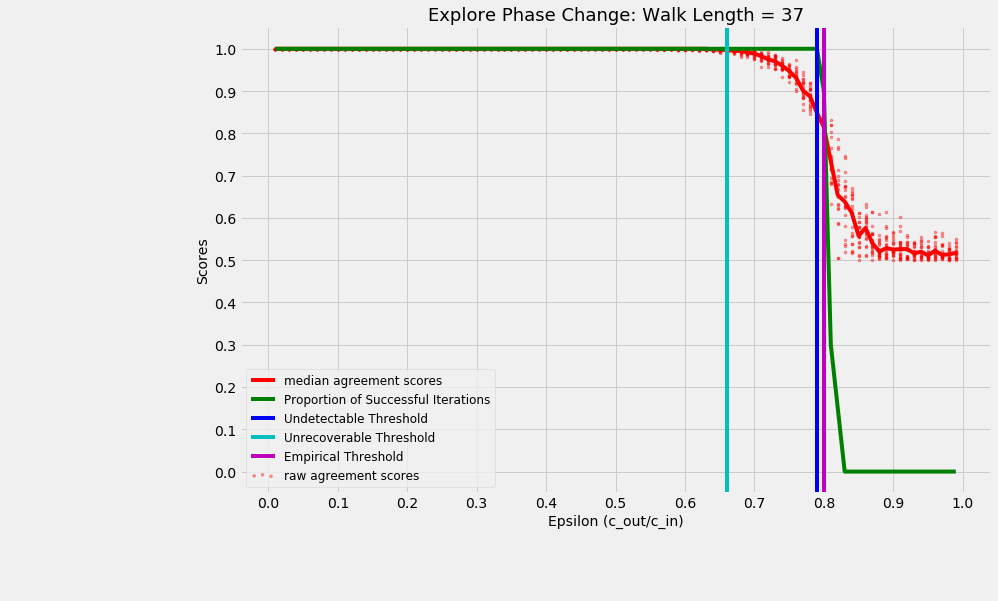

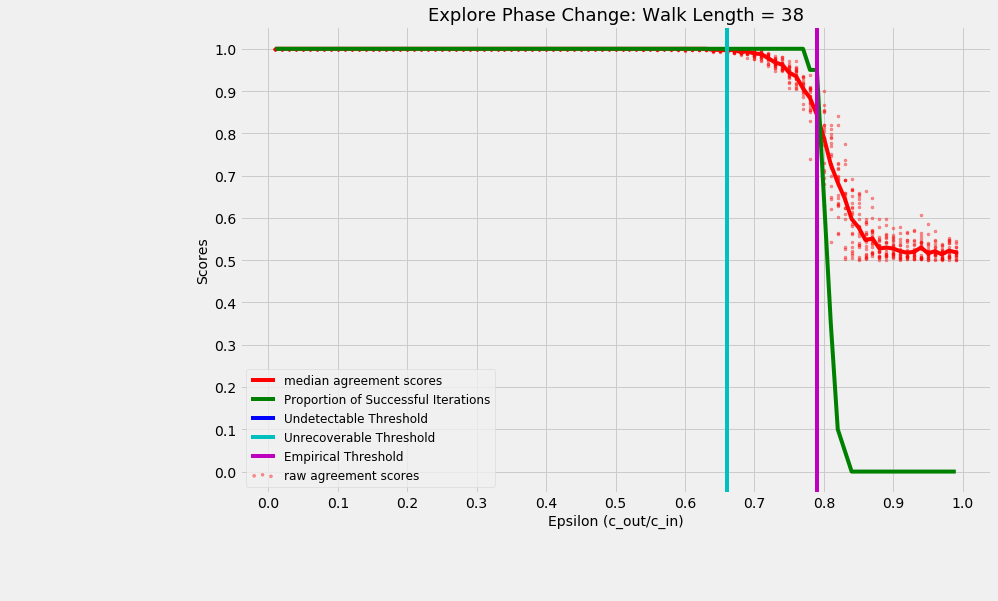

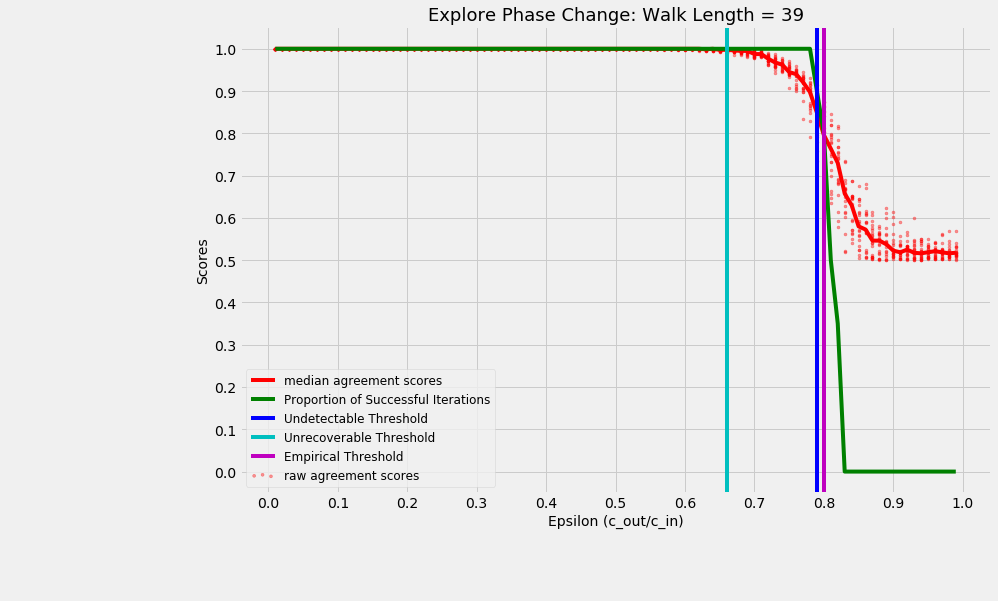

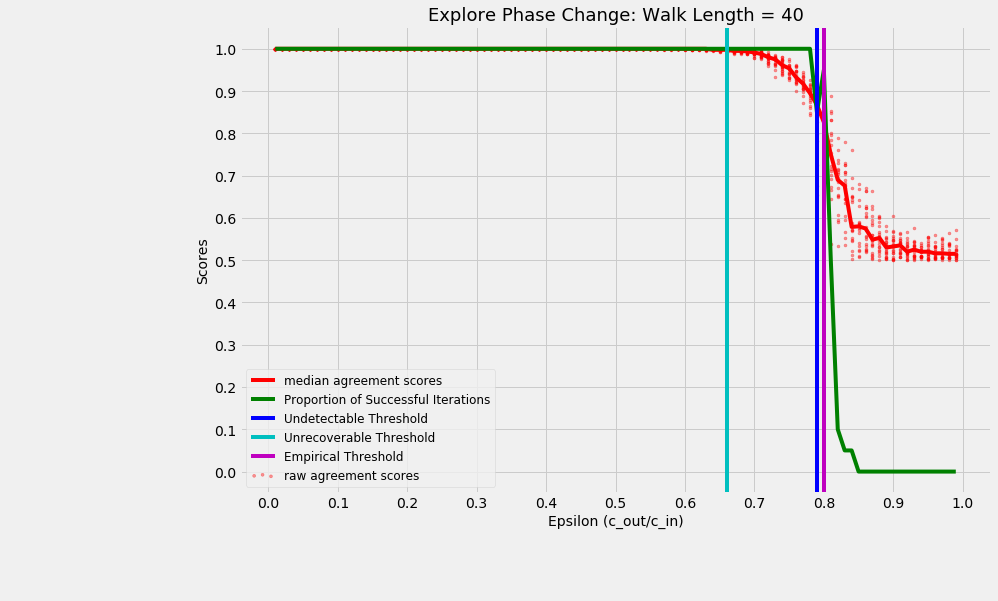

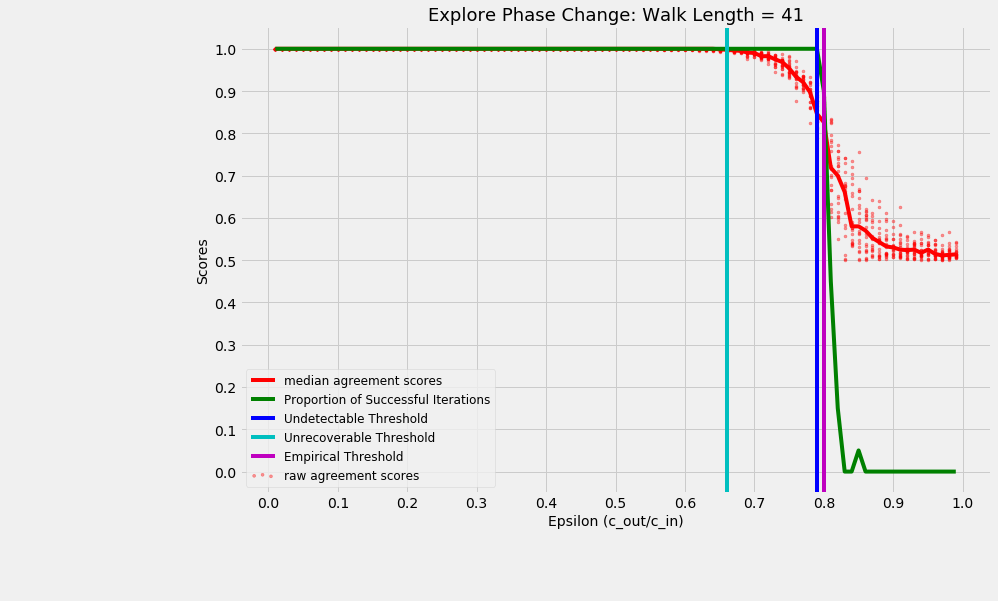

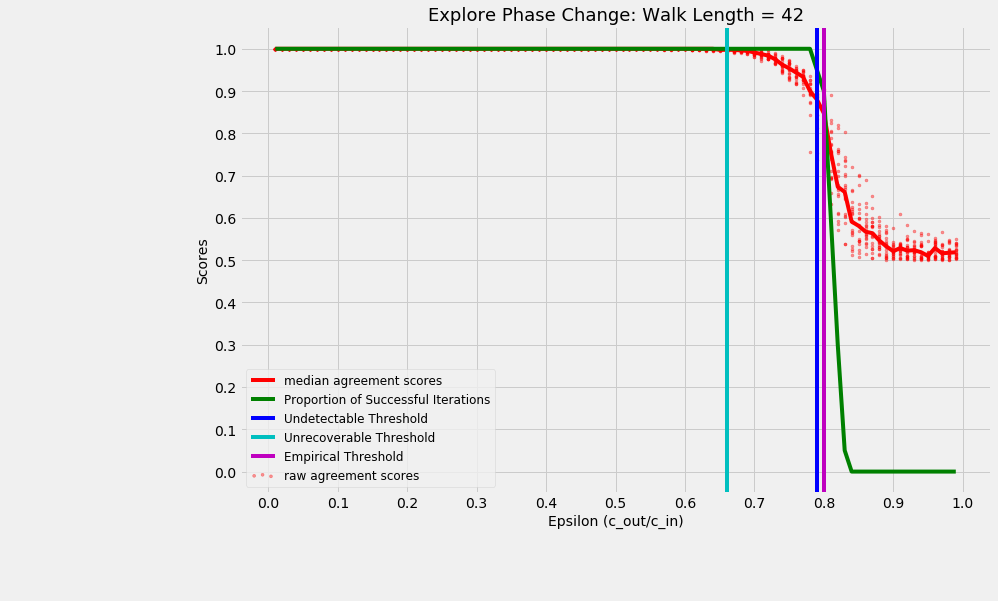

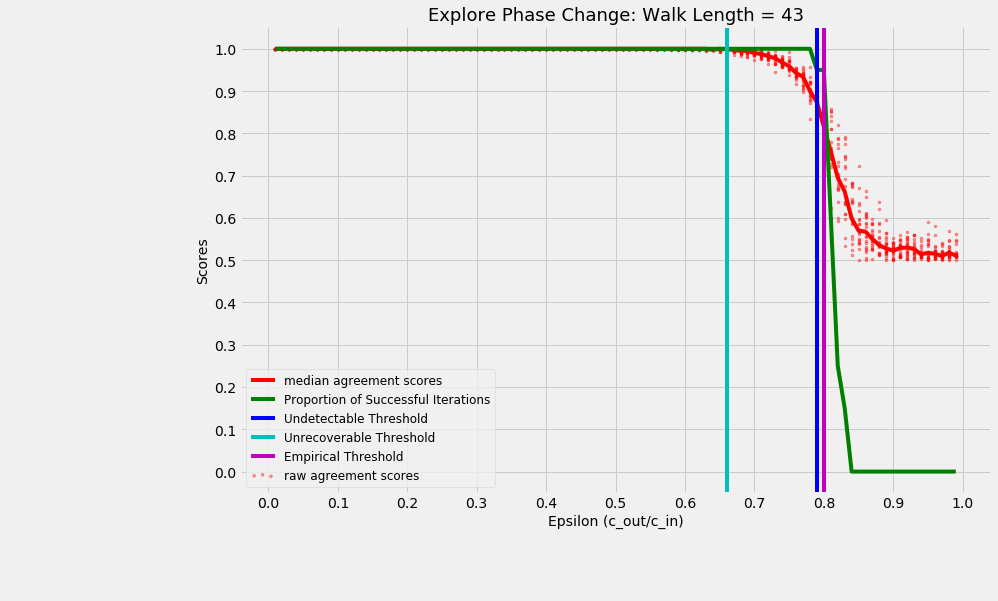

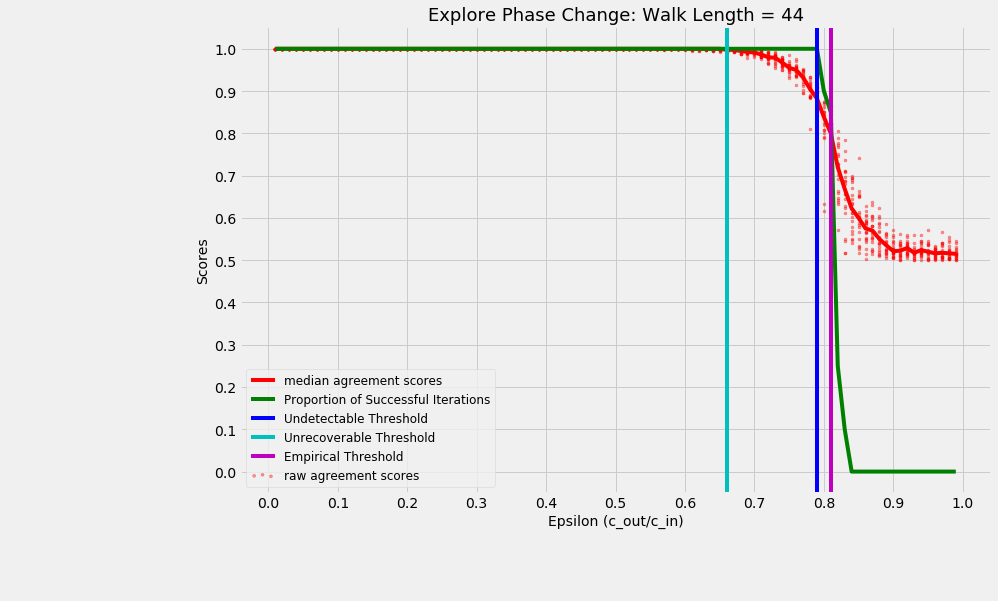

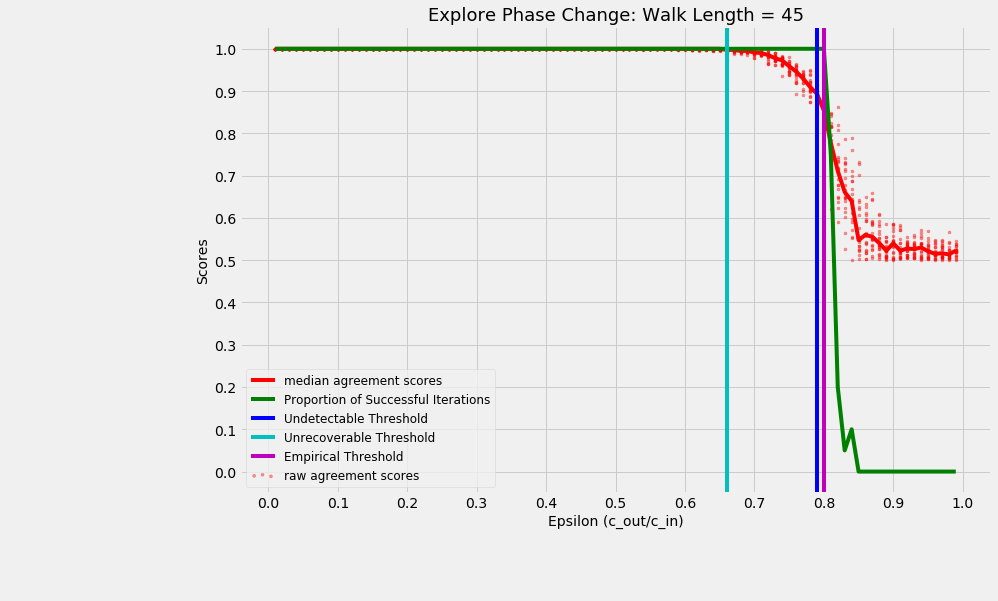

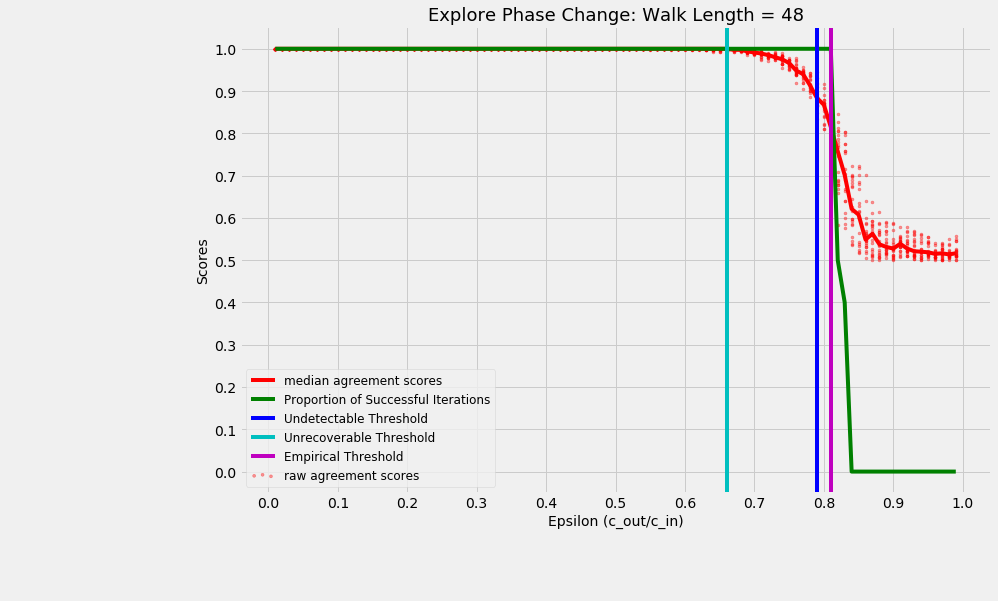

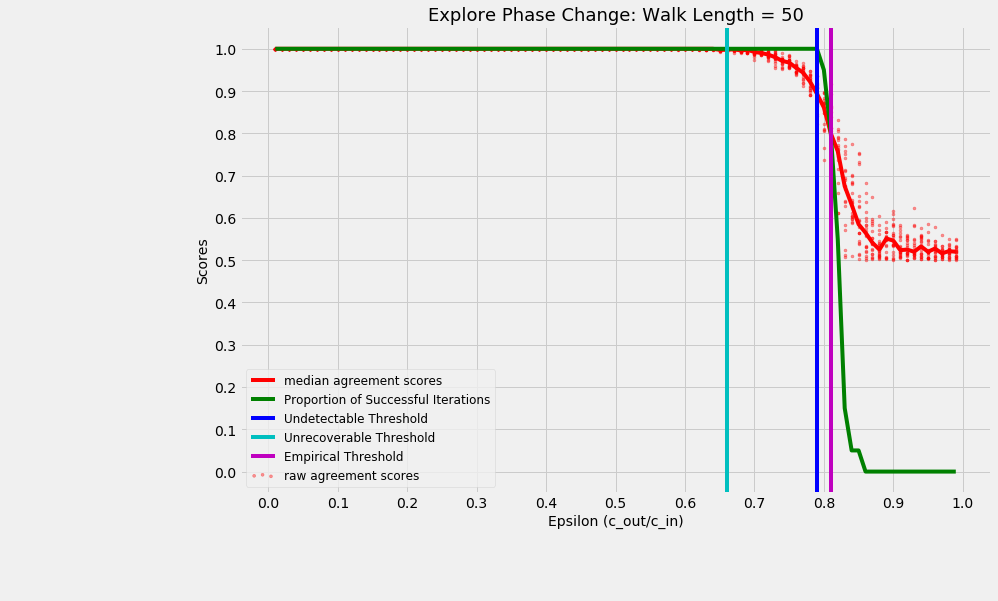

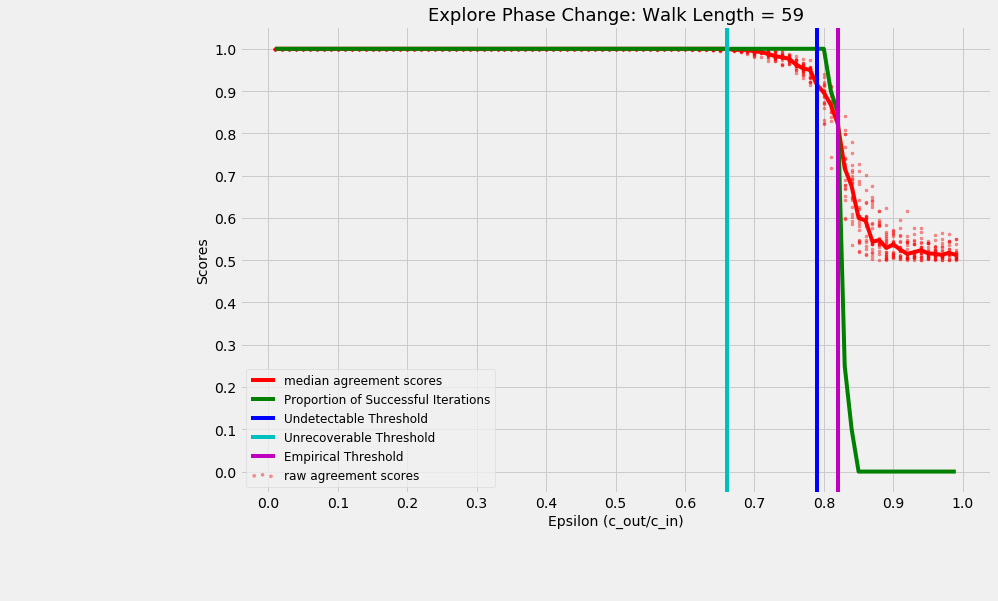

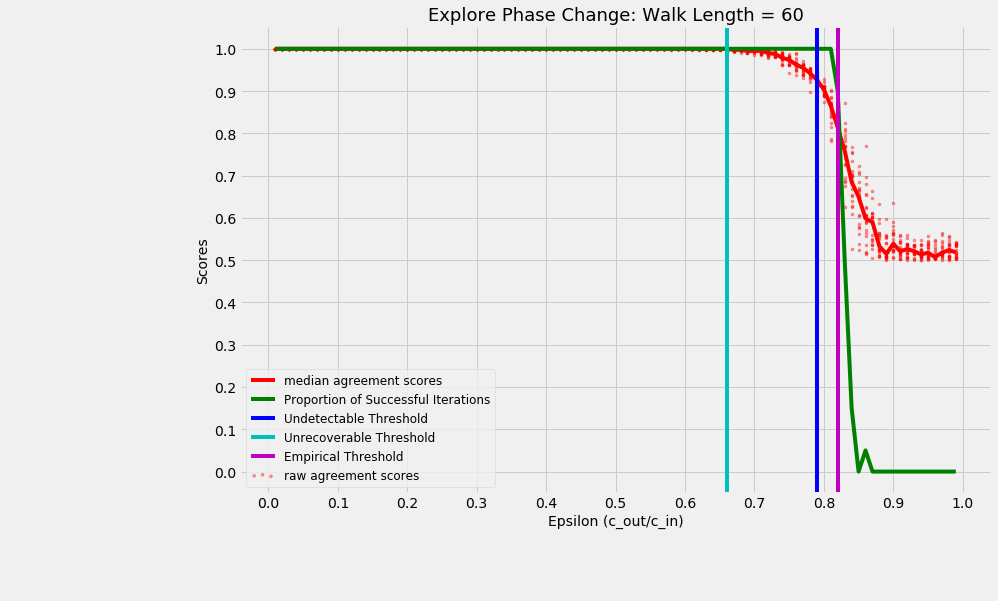

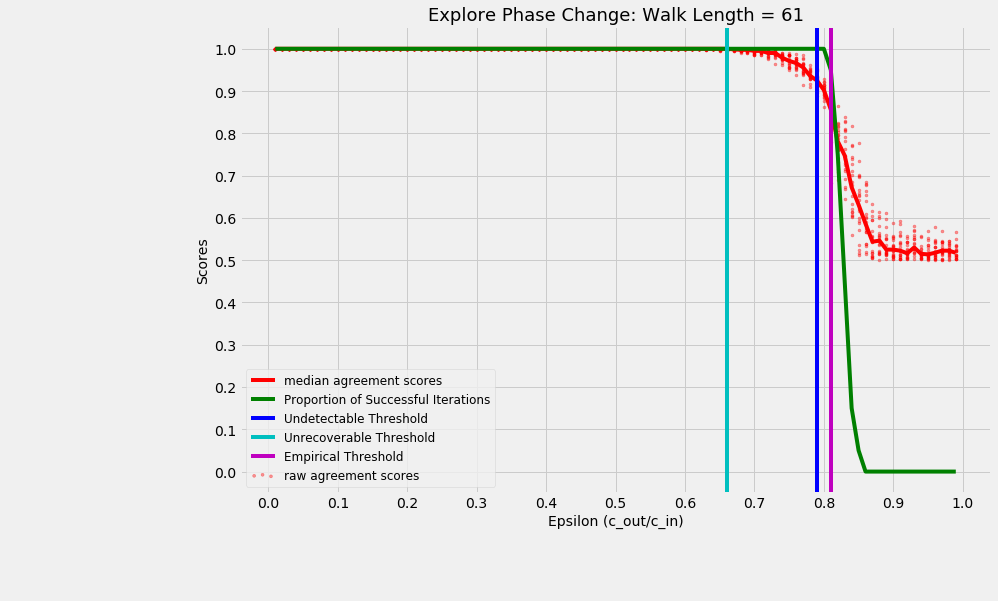

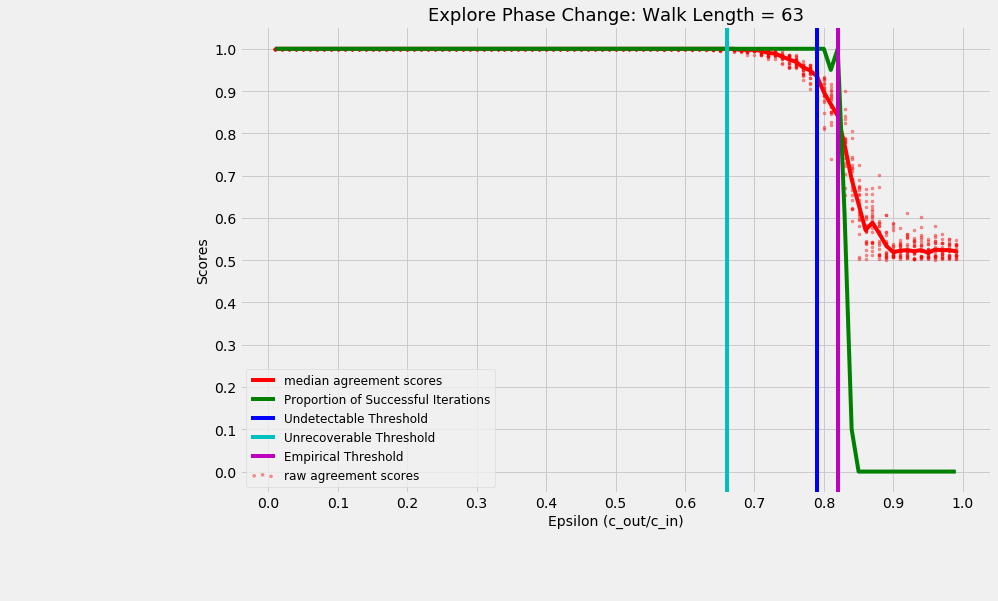

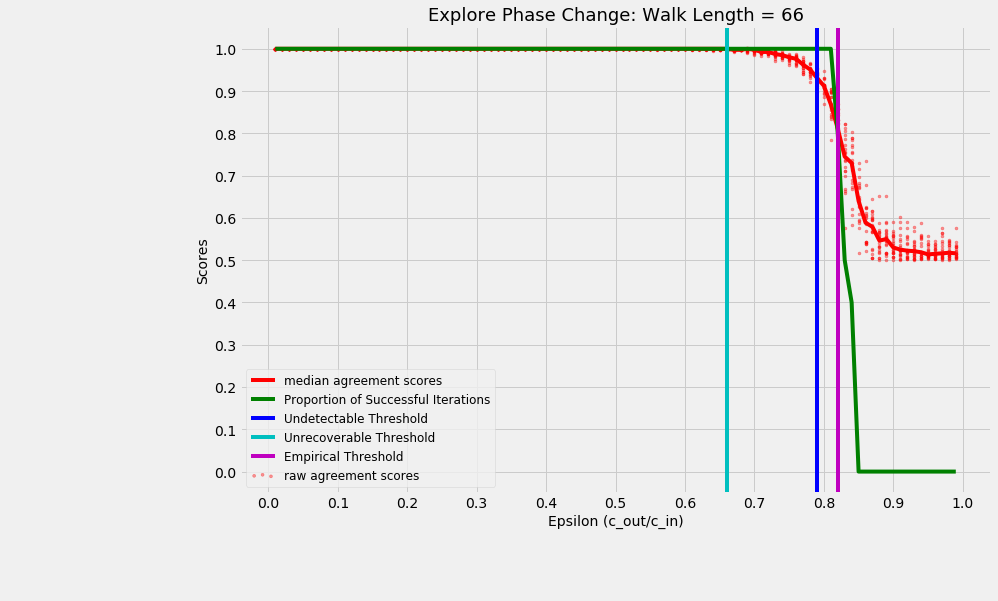

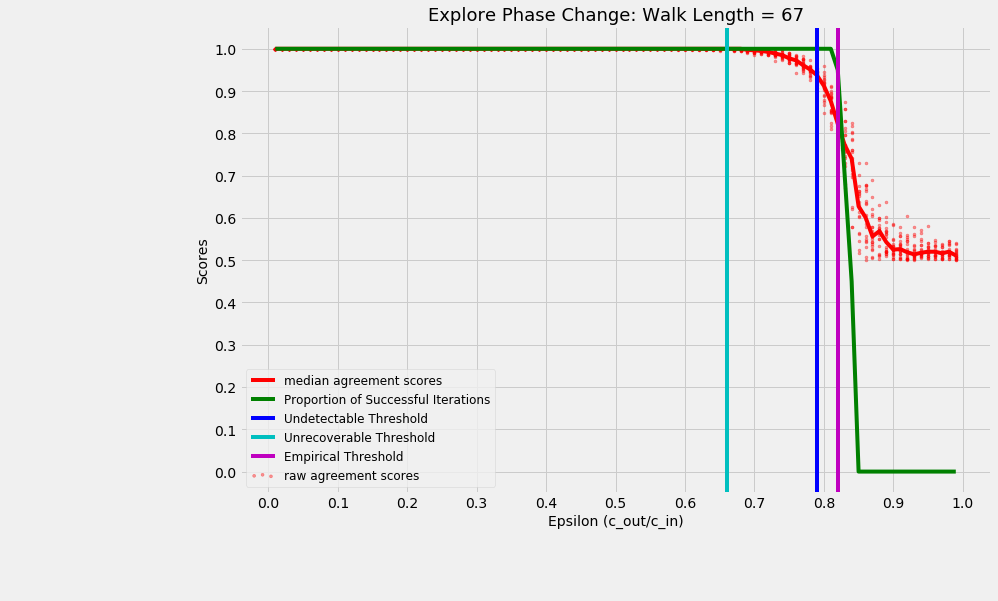

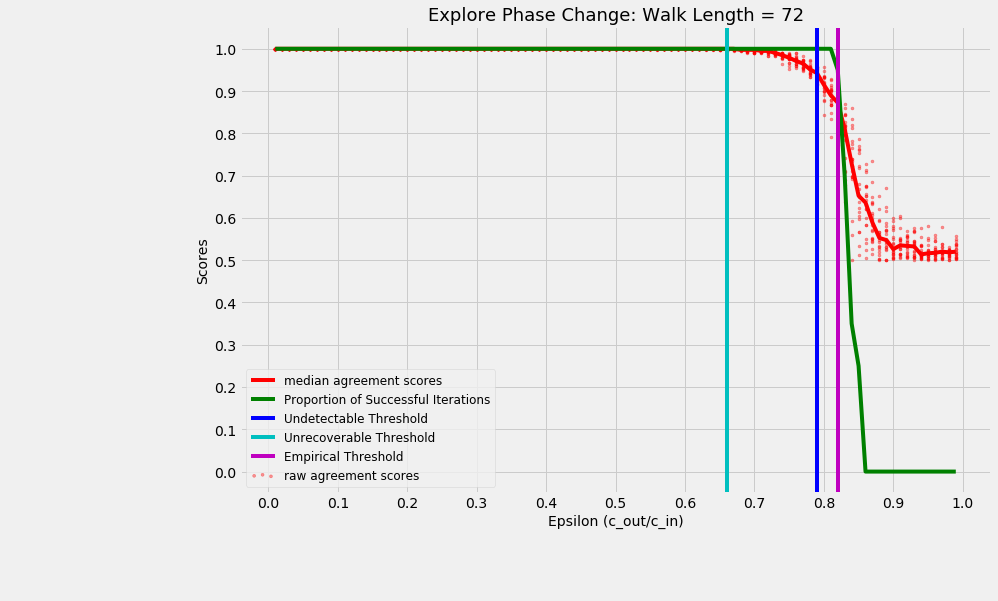

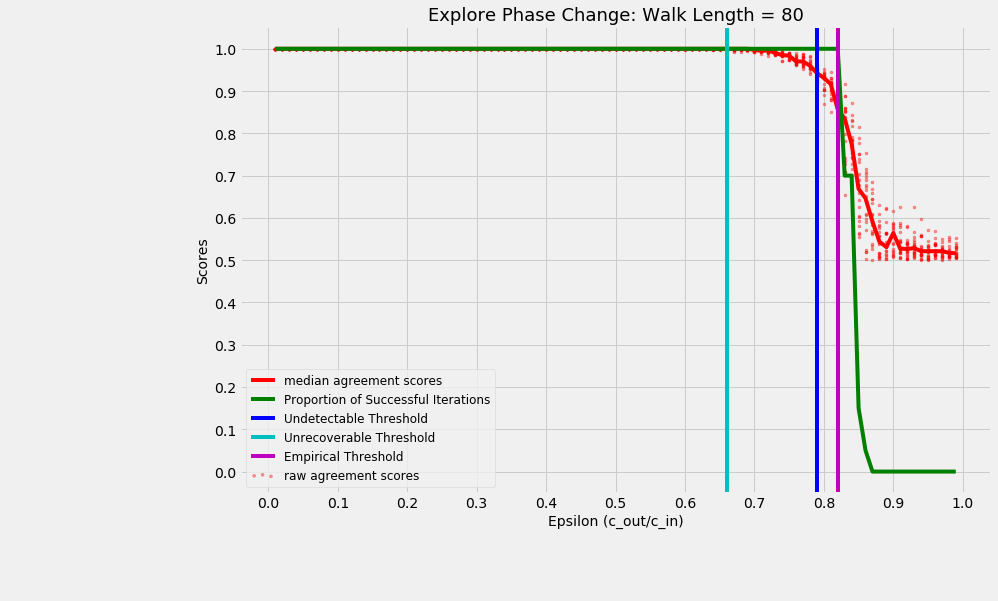

In [3]:
dir_files = [file for file in os.listdir('../data') if ('.json' in file) and ('walk_len_' in file)]

for file_name in sorted(dir_files, key=lambda x: float(x.split('walk_len_')[-1].split('.json')[0])):
    with open('../data/'+file_name, 'r') as fp:
        current_status = json.load(fp)
        plot_save_scores(file_name=file_name, **current_status, display=True)